<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S9_C4_FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install scikit-fuzzy

# Librerías

In [51]:
import numpy as np
import matplotlib.pyplot as plt

import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Caso Nivel de Lealtad

Una cadena de supermercados desea clasificar a sus clientes según su **nivel de lealtad** , utilizando los datos de **frecuencia de compra** y el **gasto promedio por visita**.



# Paso 1. Variables de Entrada

* Gasto Promedio por Visita (COP)=> Gasto: {Bajo, medio, alto}. U : [0,800.000]
* Frecuencia de compra (visitas/mes)=> Frecuencia: {Baja, media, alta} U: [0, 30]

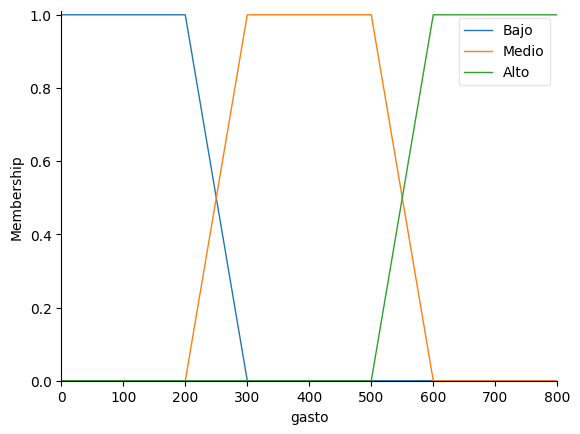

In [52]:
gasto = ctrl.Antecedent(np.arange(0,801,1),'gasto')
gasto['Bajo'] = fuzz.trapmf(gasto.universe,[0,0,200,300]) # Trap: trapezoidal mf: membershio funtion
gasto['Medio'] = fuzz.trapmf(gasto.universe,[200,300,500,600])
gasto['Alto'] = fuzz.trapmf(gasto.universe,[500,600,800,800])
gasto.view()

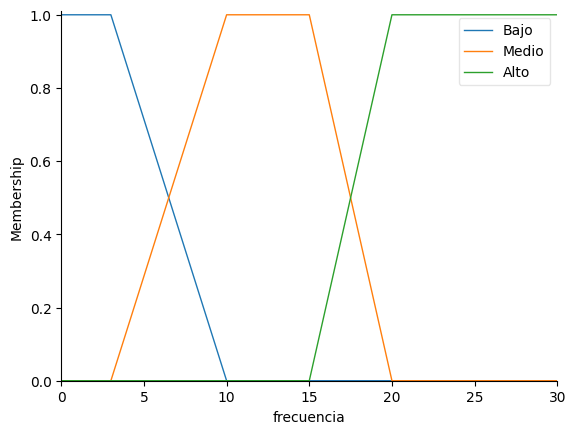

In [53]:
frecuencia = ctrl.Antecedent(np.arange(0,31,1),'frecuencia')
frecuencia['Bajo'] = fuzz.trapmf(frecuencia.universe,[0,0,3,10]) # Trap: trapezoidal mf: membershio funtion
frecuencia['Medio'] = fuzz.trapmf(frecuencia.universe,[3,10,15,20])
frecuencia['Alto'] = fuzz.trapmf(frecuencia.universe,[15,20,30,30])
frecuencia.view()

# Paso 2. Variable de salida

* Nivel de Lealtad=> Lealtad: {Baja, media, alta}. U : [0,10]

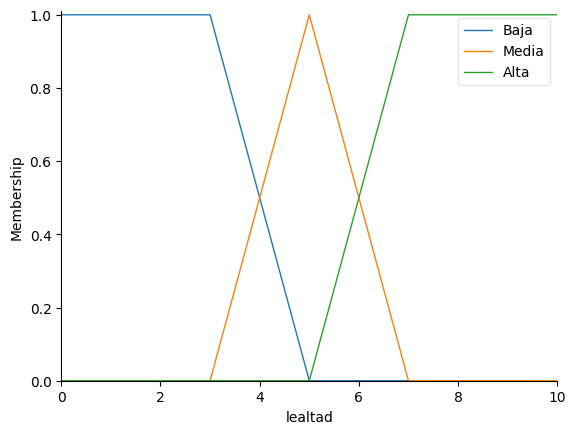

In [54]:
lealtad = ctrl.Consequent(np.arange(0,11,1), 'lealtad')
lealtad['Baja'] = fuzz.trapmf(lealtad.universe, [0,0,3,5])
lealtad['Media'] = fuzz.trimf(lealtad.universe, [3,5,7])
lealtad['Alta'] = fuzz.trapmf(lealtad.universe, [5,7,10,10])
lealtad.view()

# Paso 3. Sistema de Reglas ( Base del conocimiento)

## Reglas ( Se usó la matriz de asociación difusa)


1. **SI** El Gasto es *Bajo* y La Frecuencia es *Baja* **ENTONCES** La lealtad es *Baja*

2. **SI** El Gasto es *Bajo* y La Frecuencia es *Media* **ENTONCES** La lealtad es *Baja*

3. **SI** El Gasto es *Bajo* y La Frecuencia es *Alta* **ENTONCES** La lealtad es *Media*

4. **SI** El Gasto es *Medio* y La Frecuencia es *Baja* **ENTONCES** La lealtad es *Baja*

4. **SI** El Gasto es *Medio* y La Frecuencia es *Media* **ENTONCES** La lealtad es *Media*

4. **SI** El Gasto es *Medio* y La Frecuencia es *Alta* **ENTONCES** La lealtad es *Alta*

4. **SI** El Gasto es *Alto* y La Frecuencia es *Baja* **ENTONCES** La lealtad es *Media*

4. **SI** El Gasto es *Alto* y La Frecuencia es *Media* **ENTONCES** La lealtad es *Alta*

4. **SI** El Gasto es *Alto* y La Frecuencia es *Alta* **ENTONCES** La lealtad es *Alta*

In [55]:
R1 = ctrl.Rule(gasto['Bajo'] & frecuencia['Bajo'], lealtad['Baja'])
R2 = ctrl.Rule(gasto['Bajo'] & frecuencia['Medio'], lealtad['Baja'])
R3 = ctrl.Rule(gasto['Bajo'] & frecuencia['Alto'], lealtad['Media'])

R4 = ctrl.Rule(gasto['Medio'] & frecuencia['Bajo'], lealtad['Baja'])
R5 = ctrl.Rule(gasto['Medio'] & frecuencia['Medio'], lealtad['Media'])
R6 = ctrl.Rule(gasto['Medio'] & frecuencia['Alto'], lealtad['Alta'])

R7 = ctrl.Rule(gasto['Alto'] & frecuencia['Bajo'], lealtad['Media'])
R8 = ctrl.Rule(gasto['Alto'] & frecuencia['Medio'], lealtad['Alta'])
R9 = ctrl.Rule(gasto['Alto'] & frecuencia['Alto'], lealtad['Alta'])

# Paso 4. Inferencia

In [56]:
sys = ctrl.ControlSystem([R1,R2,R3,R4,R5,R6,R7,R8,R9])
sim = ctrl.ControlSystemSimulation(sys)

# Paso 5. Evaluar

* Dar los valores en la entrada de gasto y frecuencia y recibir el nivel de lealtad

Punto de prueba: Gasto= 400, Frecuencia = 30


In [65]:
sim.input['gasto'] = 800
sim.input['frecuencia'] = 30
sim.compute()
print("El nivel de lealtad = ", sim.output['lealtad'])

El nivel de lealtad =  7.958333333333333


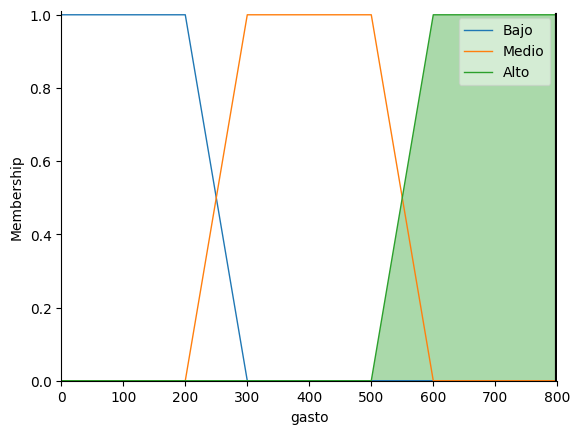

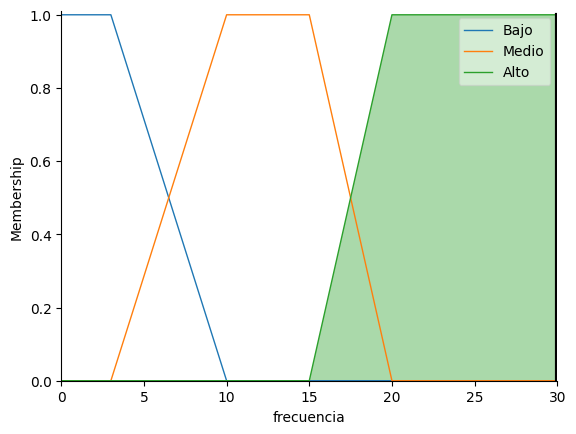

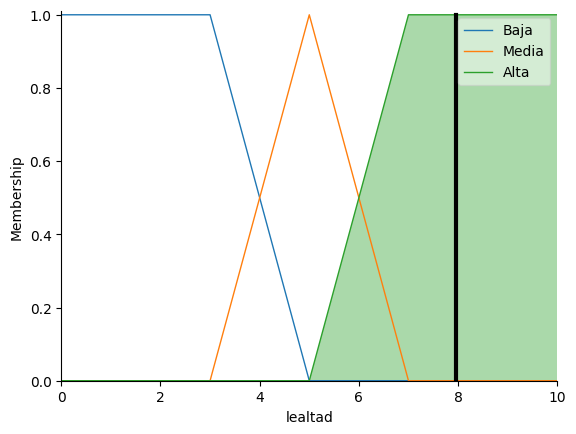

In [66]:
gasto.view(sim=sim)
frecuencia.view(sim=sim)
lealtad.view(sim=sim)

In [67]:
num = (1/6)*(7**3 - 5**3) -(5/4)*(7**2- 5**2) +(1/2)*(10**2- 7**2)
den = (7/4)*(7**2-5**2)-(5/2)*2+3
centroide = num/den
centroide

0.7958333333333332